In [76]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV

#cross validation 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#scorring 
from sklearn.metrics import recall_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Common Model Algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier;
from sklearn.neural_network import MLPClassifier

In [17]:
train_data=pd.read_csv('/content/drive/MyDrive/my_data/my_Kaggle/loan_prediction_data/train.csv')
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
# Suppression de la caractéristique  Loan_ID
df=train_data.copy()
del(df['Loan_ID'])
df['Credit_History']=df['Credit_History'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


## Exploratory Data Analysis


In [22]:
#Features Analysis 
df_cat=df.select_dtypes(include='object') 
df_num=df.select_dtypes(include=(('float','int')))
print('les caractéristiques catégorielles :\n',df_cat.columns.values)
print('\nles caractéristiques numériques :\n',df_num.columns.values)
loan_ok=df[df['Loan_Status']=='Y']
loan_nok=df[df['Loan_Status']=='N']
num_col=df_num.columns.values
cat_col=df_cat.columns.values

les caractéristiques catégorielles :
 ['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'Credit_History' 'Property_Area' 'Loan_Status']

les caractéristiques numériques :
 ['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term']


### les valeurs manquantes
Compléter les données manquants pour les cara. catégorielles par les catégories les  plus fréquentes  "most frequent". 
Pour les cara numériques les valeurs manquantes seront remplacées par les moyennes mais cela sera fait après fractionnement des données en (train et test) pour éviter toute fuite de données entre le train et le test data.



In [82]:
s=(df.isna().sum(axis=0)/len(df)*100).round(2).sort_values(ascending=False)
print(f'**percentage of NaN for each feature**\n{s}  \n')

#print('Heatmap to visualize missing data')
#plt.figure(figsize=(15,10))
#sns.heatmap(df.isna(),cbar=True) 

for col in cat_col:
  df_cat[col].fillna(df_cat[col].value_counts().index[0],inplace=True)

**percentage of NaN for each feature**
Credit_History       8.14
Self_Employed        5.21
LoanAmount           3.58
Dependents           2.44
Loan_Amount_Term     2.28
Gender               2.12
Married              0.49
Loan_Status          0.00
Property_Area        0.00
CoapplicantIncome    0.00
ApplicantIncome      0.00
Education            0.00
dtype: float64  



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### Exploration des caractéristiques catégorielles

In [81]:
# les differentes catégories de chaque caractéristique catégorielle:
for col in df_cat.columns:
    print(f'{col :.<50} {df_cat[col].unique()}')

Gender............................................ ['Male' 'Female']
Married........................................... ['No' 'Yes']
Dependents........................................ ['0' '1' '2' '3+']
Education......................................... ['Graduate' 'Not Graduate']
Self_Employed..................................... ['No' 'Yes']
Credit_History.................................... [1. 0.]
Property_Area..................................... ['Urban' 'Rural' 'Semiurban']
Loan_Status....................................... ['Y' 'N']


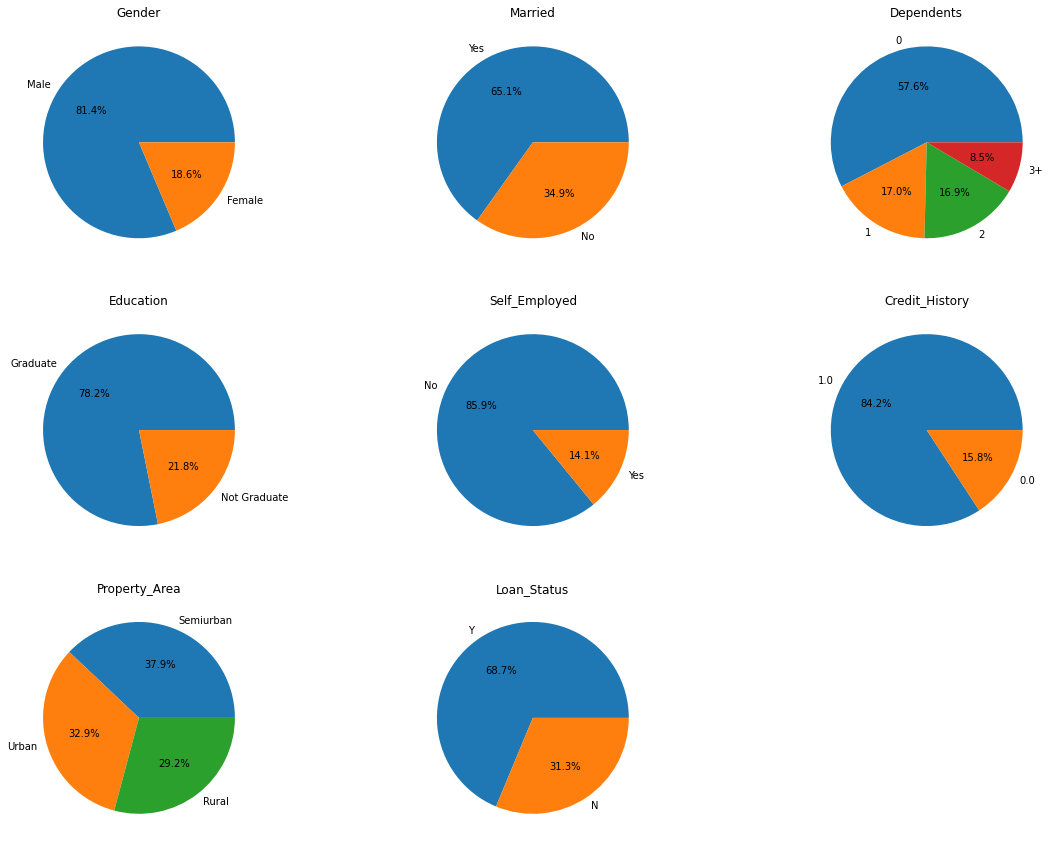

In [65]:
fig,axes=plt.subplots(3,3,figsize=(20,15))
for i,col in enumerate(cat_col):
    r=i//3
    c=i%3
    axes[r,c].pie(df[col].value_counts(),labels= df[col].value_counts().index, autopct='%.1f%%')
    axes[r,c].set_title(col)
fig.delaxes(axes[2,2])

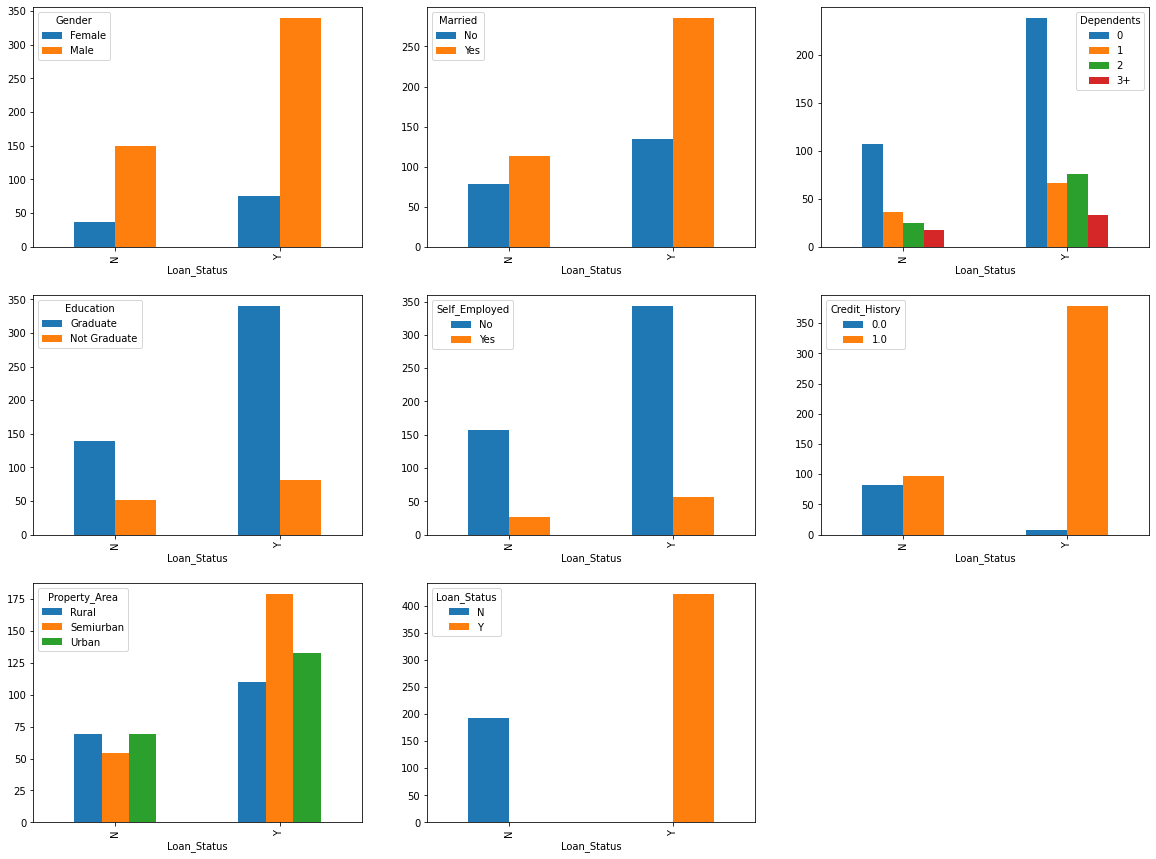

In [69]:
#Correlation entre les catégories et la target
fig,axes = plt.subplots(3,3,figsize=(20,15))
fig.delaxes(axes[2,2])
for i,col in enumerate(cat_col):
    #plt.figure(8,10)
    r=i//3
    c=i%3
    pd.crosstab(df['Loan_Status'],df[col]).plot.bar(ax=axes[r,c])


On constate qu'il y a une forte correlation entre la paramètre Credit_History et notre target 'Loan_status
'

### Exploration des caractéristiques numériques

In [110]:
df_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


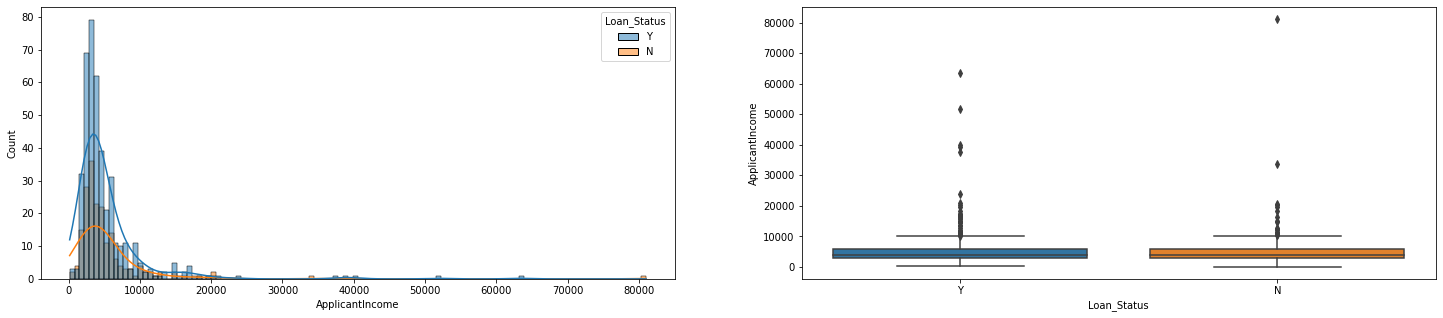

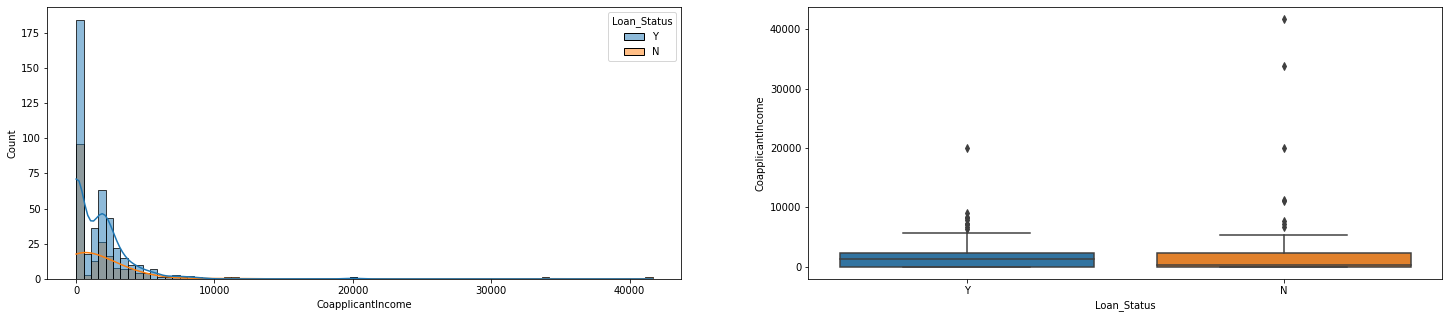

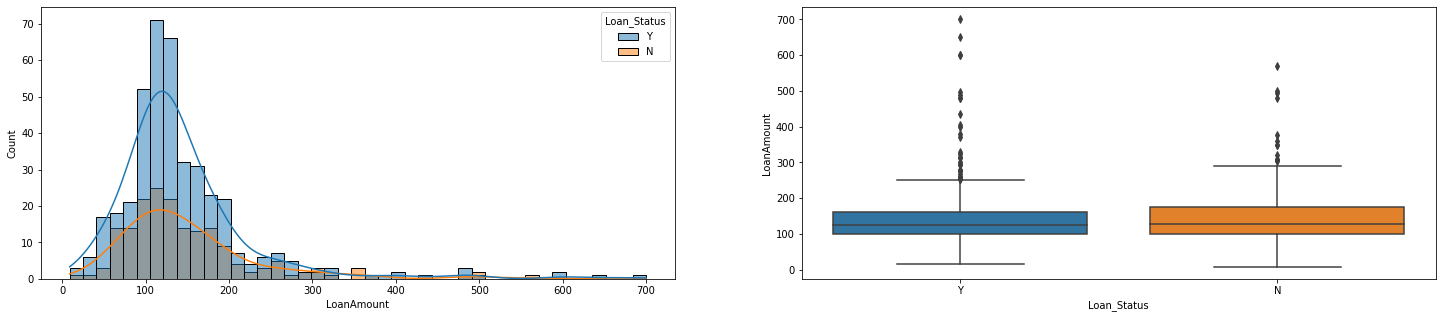

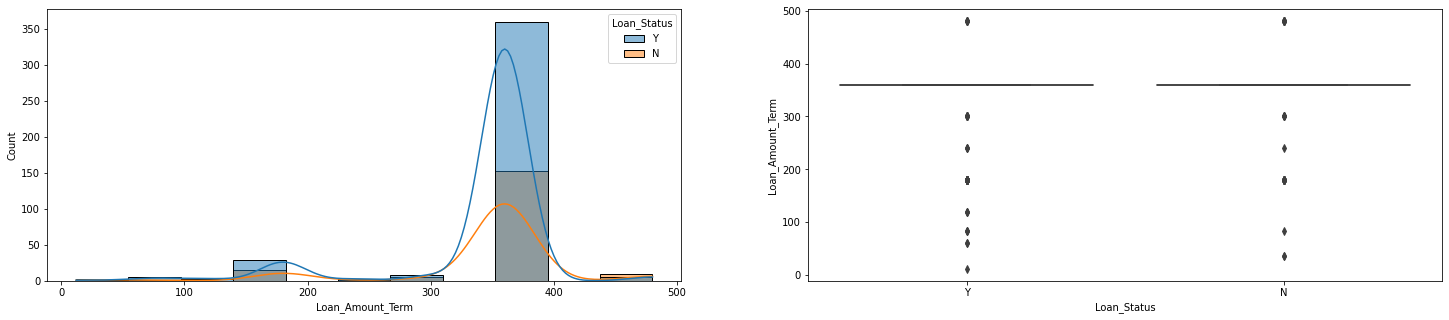

In [75]:
for col in num_col:
  plt.figure(figsize=(25,5))
  #sns.displot(loan_ok[col],label='Loan_OK',kind='kde')
  #sns.displot(loan_nok[col],label='Loan_NOK',kind='kde',color='r')
  #plt.legend()
  plt.subplot(121)
  sns.histplot(df,x=df[col],hue='Loan_Status', kde=True,multiple="layer" )
  plt.subplot(122)
  sns.boxplot(x=df['Loan_Status'], y=df[col])



On constate une légère correlation entre la target et le paramètre 'applicantincome' sinon les autres paramètres numériques ne permettront pas d'avoir un modèle performant

### Encodage des caractéristiques catégorielles et de la target


In [199]:
df1=df.copy()
target=df1.pop('Loan_Status')
df1_cat=df1.select_dtypes('object')
orde=OrdinalEncoder()
#Encodage
df1e_cat=orde.fit_transform(df1_cat)
df1e_cat=pd.DataFrame(df1e_cat, columns=df1_cat.columns)

#Encodage de la target
le=LabelEncoder()
y=le.fit_transform(target)


# Modeling 

In [202]:
df1_num=df1.select_dtypes(('int','float'))
dft=pd.concat((df1e_cat,df1_num),axis=1)
X_train, X_test, y_train, y_test= train_test_split(dft,y,test_size=0.2, random_state=0)

#Normalisation et valeur manquantes pour les caractéristiques numériques
Scaler=MinMaxScaler()
#Scaler=StandardScaler()

for col in X_train.select_dtypes(('int','float')).columns:
  X_train[col].fillna(X_train[col].mean(), inplace=True)
  X_test[col].fillna(X_train[col].mean(), inplace=True) # utilisation de la moyenne sur le train pour éviter la fuite de données.

X_train_s=Scaler.fit_transform(X_train)
X_train_s=pd.DataFrame(X_train_s, columns=X_train.columns)
X_test_s=MMScaler.transform(X_test) # application seulement de la transformation pour éviter la fuite de données.
X_test_s=pd.DataFrame(X_test_s, columns=X_test.columns)
print('X_train shape :' , X_train.shape)
print('y_train shape :' , y_train.shape)
print('X_test shape  :', X_test.shape)
print('y_test shape  :', y_test.shape)

X_train shape : (491, 11)
y_train shape : (491,)
X_test shape  : (123, 11)
y_test shape  : (123,)


In [217]:
#Feature selection using the selector recursive feature elimination/ with Logestic Regression
from sklearn.feature_selection import RFE
lm=LogisticRegression()
selector_rfe=RFE(lm,n_features_to_select=8)
selector_rfe=selector_rfe.fit(X_train_s,y_train)
X_train_s.columns[selector_rfe.support_]

Index(['Gender', 'Married', 'Dependents', 'Credit_History', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount'],
      dtype='object')

In [219]:
#selection des paramètres
columns=['Gender','Married','Dependents','Credit_History','ApplicantIncome','CoapplicantIncome', 'LoanAmount' ]
X_train_s=X_train_s[columns]
X_test_s=X_test_s[columns]

In [213]:
random_state=0
RFR=RandomForestClassifier(
    n_jobs=1, random_state=0,
    n_estimators=10, max_features=5, max_depth=7)

GBR=GradientBoostingClassifier(
    random_state=0, 
    n_estimators=10, max_features=5, max_depth=10,
    learning_rate=0.05, subsample=0.5)

XGBC=XGBClassifier(objective='reg:squarederror',random_state=random_state,
    seed=0,
    n_estimators=10, max_depth=7,
    learning_rate=0.01, subsample=0.5 ,colsample_bytree= 0.8)

from sklearn.ensemble import StackingClassifier
stkclf=StackingClassifier([('RFR',RFR),
                       ('GBR',GBR),
                       ('XGBC',XGBC)])
classifiers = [
              stkclf,
              LogisticRegression(random_state = random_state),
              LinearDiscriminantAnalysis(),
              KNeighborsClassifier(),
              SVC(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state),
              RandomForestClassifier(random_state=random_state),
              AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1),
              GradientBoostingClassifier(random_state=random_state),
              MLPClassifier(max_iter=10000,random_state=random_state),
              SGDClassifier(random_state = random_state),
              XGBClassifier(random_state = random_state)
              ]
res_columns=['clf name', 'clf accuracy Mean', 'clf recall','clf precision','clf f1score','clfrecalltest']
df_result = pd.DataFrame(columns = res_columns)

cv=StratifiedKFold(5)
idx_raws=0
for cl in tqdm(classifiers): 
    monclf=cl.fit(X_train_s,y_train)
    df_result.loc[idx_raws, 'clf name']= cl.__class__.__name__
    df_result.loc[idx_raws,'clf accuracy Mean' ]=cross_val_score(cl,X_train_s, y_train, scoring='accuracy', cv=cv).mean()
    df_result.loc[idx_raws,'clf recall' ]=cross_val_score(cl,X_train_s, y_train, scoring='recall', cv=cv).mean()
    df_result.loc[idx_raws,'clf precision' ]=cross_val_score(cl,X_train_s, y_train, scoring='precision', cv=cv).mean()
    df_result.loc[idx_raws,'clf f1score' ]=cross_val_score(cl,X_train_s, y_train, scoring='f1', cv=cv).mean()
    df_result.loc[idx_raws,'accuracy_testdata' ]=accuracy_score(y_test,monclf.predict(X_test_s))
    idx_raws=idx_raws+1

df_result.sort_values(by='accuracy_testdata',ascending=False,inplace=True)
df_result

100%|██████████| 12/12 [00:35<00:00,  2.95s/it]


,clf name,clf accuracy Mean,clf recall,clf precision,clf f1score,clfrecalltest,accuracy_testdata
2,LinearDiscriminantAnalysis,0.804432,0.981909,0.784508,0.871917,NaN,0.837398
9,MLPClassifier,0.802391,0.978924,0.784014,0.870391,NaN,0.837398
1,LogisticRegression,0.804432,0.984939,0.783045,0.87225,NaN,0.829268
4,SVC,0.804432,0.984939,0.783045,0.87225,NaN,0.829268
10,SGDClassifier,0.781983,0.949028,0.778682,0.854126,NaN,0.829268
11,XGBClassifier,0.784086,0.948711,0.780813,0.856196,NaN,0.813008
0,StackingClassifier,0.790167,0.963772,0.778864,0.861374,NaN,0.804878
8,GradientBoostingClassifier,0.778005,0.930574,0.782664,0.849999,NaN,0.804878
3,KNeighborsClassifier,0.769779,0.918544,0.78031,0.84359,NaN,0.796748
6,RandomForestClassifier,0.784127,0.939801,0.784652,0.855043,NaN,0.780488


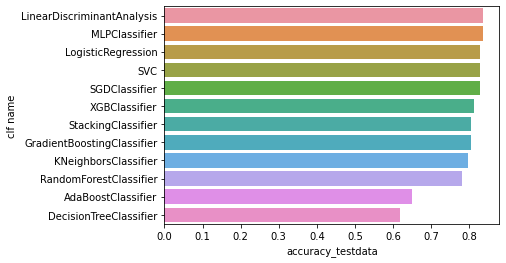

In [244]:
plt.figure()
df_result=df_result.sort_values('accuracy_testdata',ascending=False)
sns.barplot(x=df_result['accuracy_testdata'],y=df_result['clf name'],data=df_result)

Les modèle peuvent être améliorés encore plus en ajustant les hyperparmètres, dans ce cas nous alons choisir le Logistic Regression que nous allons deployer sur une application Web à l'aide du micro Framework Flask 


In [245]:
clf= LogisticRegression(random_state=0,max_iter=1000,penalty='l2')
cl=clf.fit(X_train_s.values,y_train)
print(f"L'accuracy du model : {round(cl.score(X_test_s.values,y_test),2)}")


L'accuracy du model : 0.83


In [246]:
import pickle
with open('/content/drive/MyDrive/my_data/my_Kaggle/loan_prediction_data/mymodels/mon_model.pkl', 'wb') as myfile:
    pickle.dump(cl,myfile)

In [249]:
model=pickle.load(open('/content/drive/MyDrive/my_data/my_Kaggle/loan_prediction_data/mymodels/mon_model.pkl', 'rb'))
print(f"L'accuracy of loaded model : {round(model.score(X_test_s.values,y_test),2)}")


L'accuracy of loaded model : 0.83
